In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [60]:
data_loc = "D:/Beam Characterization/2019_2_21/"
fname = "scanning_2019_2_21.h5"

In [5]:
fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    group = list(f.values())[0]
    readout = list(group.values())[0]
    wavemeter = list(readout.values())[1].value
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

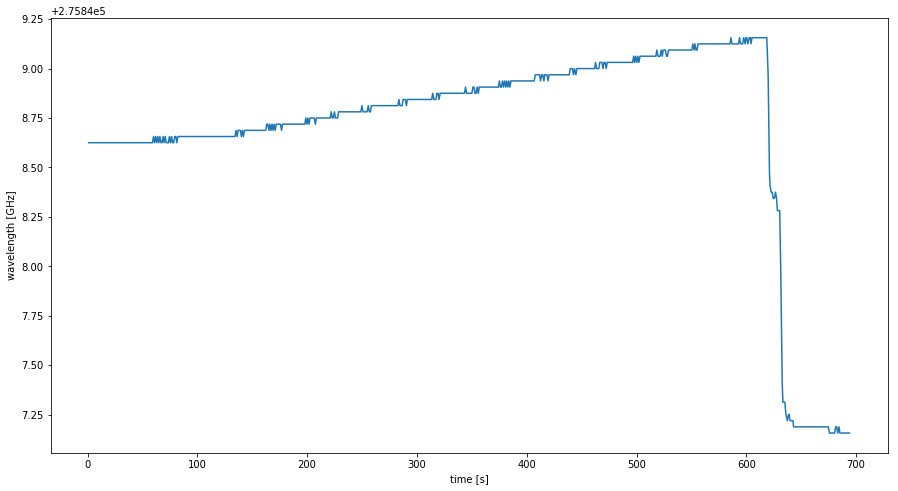

In [6]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(wavemeter[:,0], wavemeter[:,1]);
ax.set_xlabel('time [s]')
ax.set_ylabel('wavelength [GHz]');

# Correlation between photodiodes
Correlation between ch1 (absorption) and ch4 (UV power monitoring)

[1.27604836e-01 1.56567210e+04 1.97377007e-01 1.83785395e-02
 1.20771632e-02]


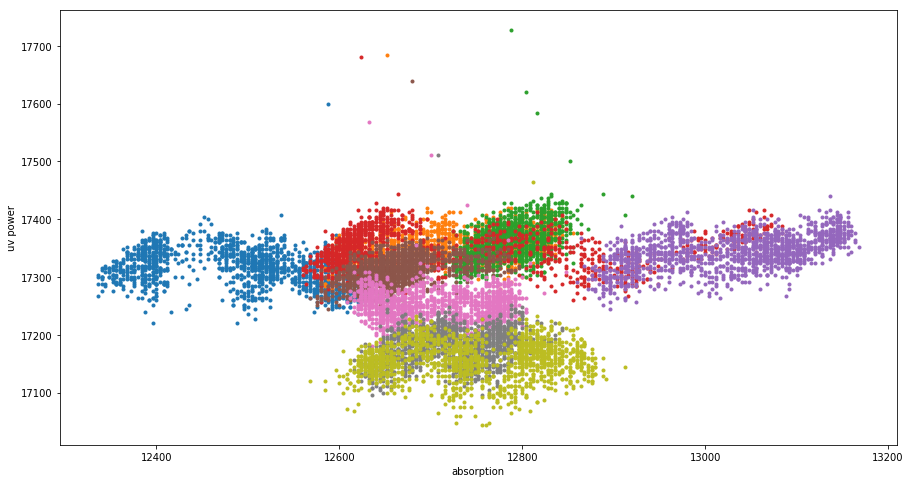

In [15]:
from scipy.stats.stats import pearsonr   
from scipy.stats import linregress

corr_abs_mon = []
fig, ax = plt.subplots(figsize = (15,8))
ax.set_xlabel("absorption")
ax.set_ylabel("uv power")
for i in range(1,10):
    corr_abs_mon.append(linregress(fast_daq['PXIe5171_{0}'.format(i)][:,1],fast_daq['PXIe5171_{0}'.format(i)][:,4]))
    ax.plot(fast_daq['PXIe5171_{0}'.format(i)][:,1],fast_daq['PXIe5171_{0}'.format(i)][:,4], '.')
print(np.mean(corr_abs_mon, axis = 0))

Correlation between ch2 (PMT) and ch4 (UV power monitoring)

[-2.41378078e-01  1.68800799e+04 -9.19099101e-02  1.37971959e-01
  6.61860482e-02]


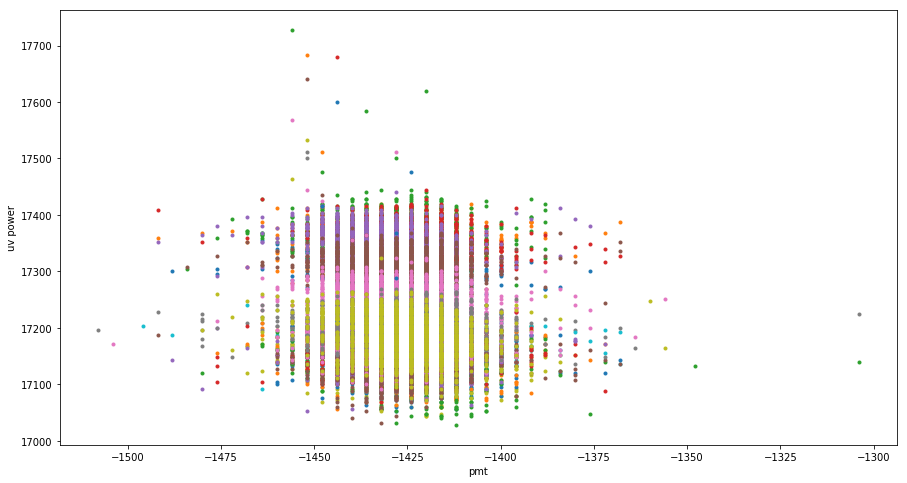

In [17]:
corr_pmt_mon = []
from scipy.stats.stats import pearsonr   
fig, ax = plt.subplots(figsize = (15,8))
ax.set_xlabel("pmt")
ax.set_ylabel("uv power")
for i in range(1,20):
    corr_pmt_mon.append(linregress(fast_daq['PXIe5171_{0}'.format(i)][:,2],fast_daq['PXIe5171_{0}'.format(i)][:,4]))
    ax.plot(fast_daq['PXIe5171_{0}'.format(i)][:,2],fast_daq['PXIe5171_{0}'.format(i)][:,4], '.')
print(np.mean(corr_pmt_mon, axis = 0))

In [20]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [27]:
wavelength_values = []
for idx in range(1,len(fast_daq)):
    wavelength_values.append((int(idx), wavemeter[:,1][find_nearest_idx(wavemeter[:,0], idx*1/25)]))
wavelength_values = np.array(wavelength_values)    

In [50]:
np.unique(wavelength_values[:,1])

array([275847.15625, 275847.1875 , 275847.21875, 275847.25   ,
       275847.3125 , 275847.40625, 275847.96875, 275848.28125,
       275848.34375, 275848.375  , 275848.40625, 275848.46875,
       275848.625  , 275848.65625, 275848.6875 , 275848.71875,
       275848.75   , 275848.78125, 275848.8125 , 275848.84375,
       275848.875  , 275848.90625, 275848.9375 , 275848.96875,
       275849.     , 275849.03125, 275849.0625 , 275849.09375,
       275849.125  , 275849.15625])

In [43]:
wavelength_data_groupave = []
for unique in np.unique(wavelength_values[:,1]):
    ind = np.where(wavelength_values[:,1] == unique)[0]
    tmp = []
    for idx in wavelength_values[:,0][ind]:
        idx = int(idx)
        tmp.append(fast_daq['PXIe5171_{0}'.format(idx)][:,1]/fast_daq['PXIe5171_{0}'.format(idx)][:,4])
    wavelength_data_groupave.append((ind, unique, np.mean(np.array(tmp), axis = 0)))

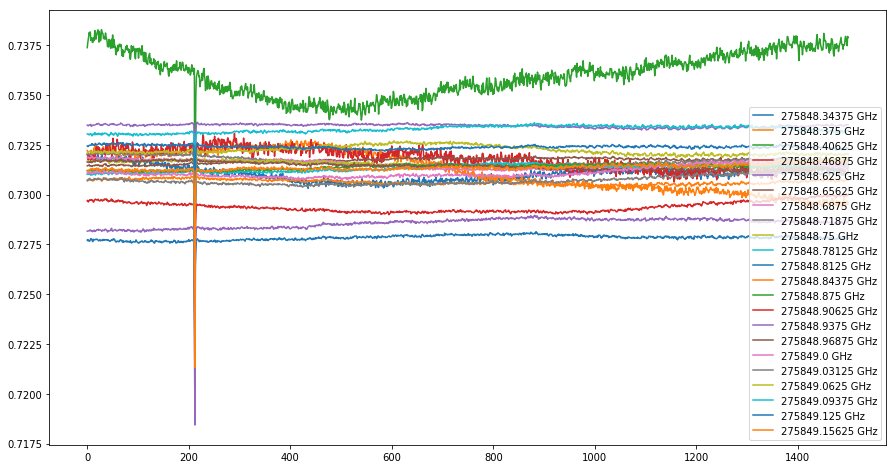

In [59]:
fig, ax = plt.subplots(figsize = (15,8))

for dat in wavelength_data_groupave[8:]:
    ax.plot(dat[2], label = '{0} GHz'.format(dat[1]))
ax.legend(loc = 4)

# Run 2

In [61]:
fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    group = list(f.values())[1]
    readout = list(group.values())[0]
    wavemeter = list(readout.values())[1].value
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

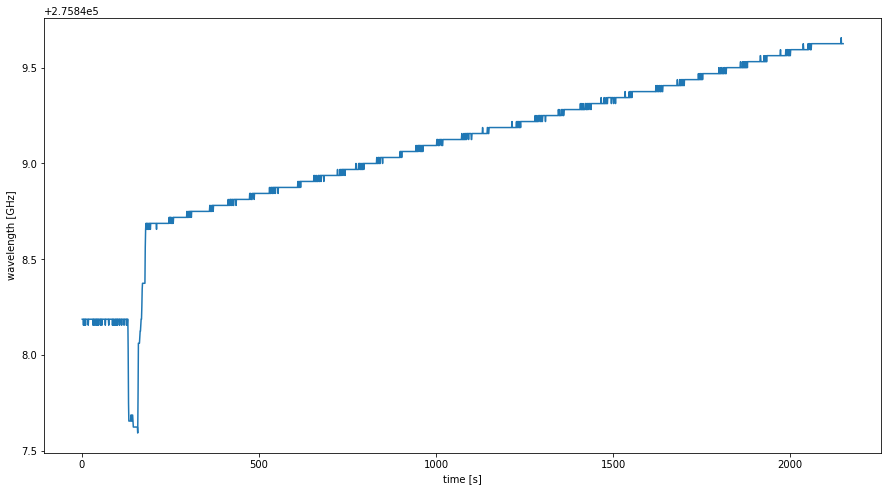

In [62]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(wavemeter[:,0], wavemeter[:,1]);
ax.set_xlabel('time [s]')
ax.set_ylabel('wavelength [GHz]');

# Correlation between photodiodes
Correlation between ch1 (absorption) and ch4 (UV power monitoring)

[2.38310670e-01 1.48548778e+04 2.67183899e-01 1.02183271e-01
 8.39438921e-03]


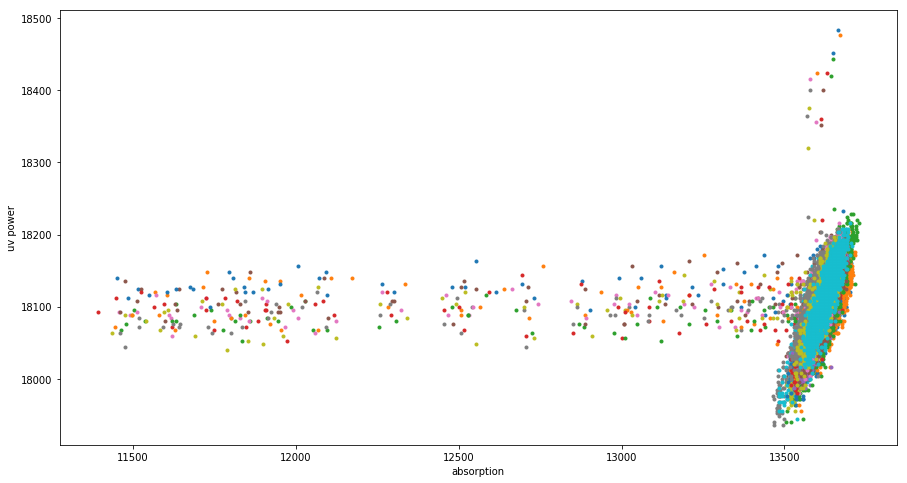

In [66]:
from scipy.stats.stats import pearsonr   
from scipy.stats import linregress

corr_abs_mon = []
fig, ax = plt.subplots(figsize = (15,8))
ax.set_xlabel("absorption")
ax.set_ylabel("uv power")
for i in range(100,120):
    corr_abs_mon.append(linregress(fast_daq['PXIe5171_{0}'.format(i)][:,1],fast_daq['PXIe5171_{0}'.format(i)][:,4]))
    ax.plot(fast_daq['PXIe5171_{0}'.format(i)][:,1],fast_daq['PXIe5171_{0}'.format(i)][:,4], '.')
print(np.mean(corr_abs_mon, axis = 0))

In [100]:
wavelength_values = []
for idx in range(1,len(fast_daq)):
    wavelength_values.append((int(idx), wavemeter[:,1][find_nearest_idx(wavemeter[:,0], idx*1/25)]))
wavelength_values = np.array(wavelength_values)    

In [101]:
intensity_mon = []
yag_fire = []

for idx in range(1,len(fast_daq)):
        intensity_mon.append(fast_daq['PXIe5171_{0}'.format(idx)][:,4].min() > 15000)
        yag_fire.append(fast_daq['PXIe5171_{0}'.format(idx)][:,5].max() > 0.5e4)
        
map_ok = [a and b for a,b in zip(intensity_mon, yag_fire)]

In [85]:
wavelength_values = []
for idx in range(1,len(fast_daq)):
    wavelength_values.append((int(idx), wavemeter[:,1][find_nearest_idx(wavemeter[:,0], idx*1/25)]))
wavelength_values = np.array(wavelength_values)

In [160]:
wavelength_data_groupave = []
for unique in np.unique(wavelength_values[:,1]):
    ind = np.where(wavelength_values[:,1] == unique)[0]
    tmp = []
    for idx in wavelength_values[:,0][ind]:
        idx = int(idx)
        if map_ok[idx-1]:
            tmp.append(fast_daq['PXIe5171_{0}'.format(idx)][:,1]/fast_daq['PXIe5171_{0}'.format(idx)][:,4])
    if len(tmp) > 0:
        wavelength_data_groupave.append((ind, unique, np.mean(np.array(tmp), axis = 0),wavelength_values[:,0][ind]))

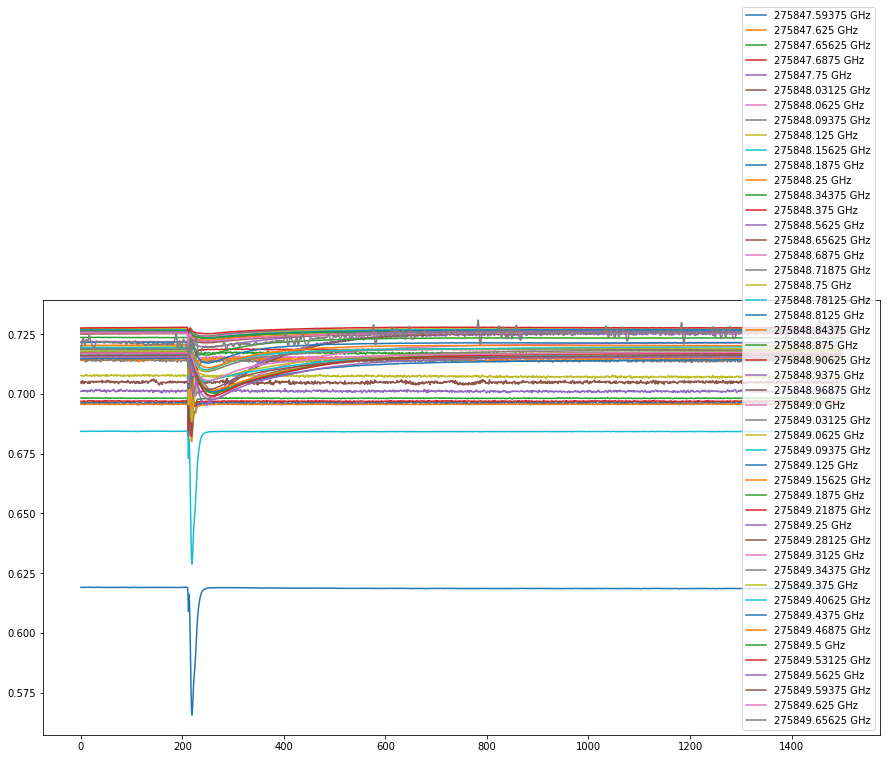

In [161]:
fig, ax = plt.subplots(figsize = (15,8))

for dat in wavelength_data_groupave:
    ax.plot(dat[2], label = '{0} GHz'.format(dat[1]))
ax.legend(loc = 4)

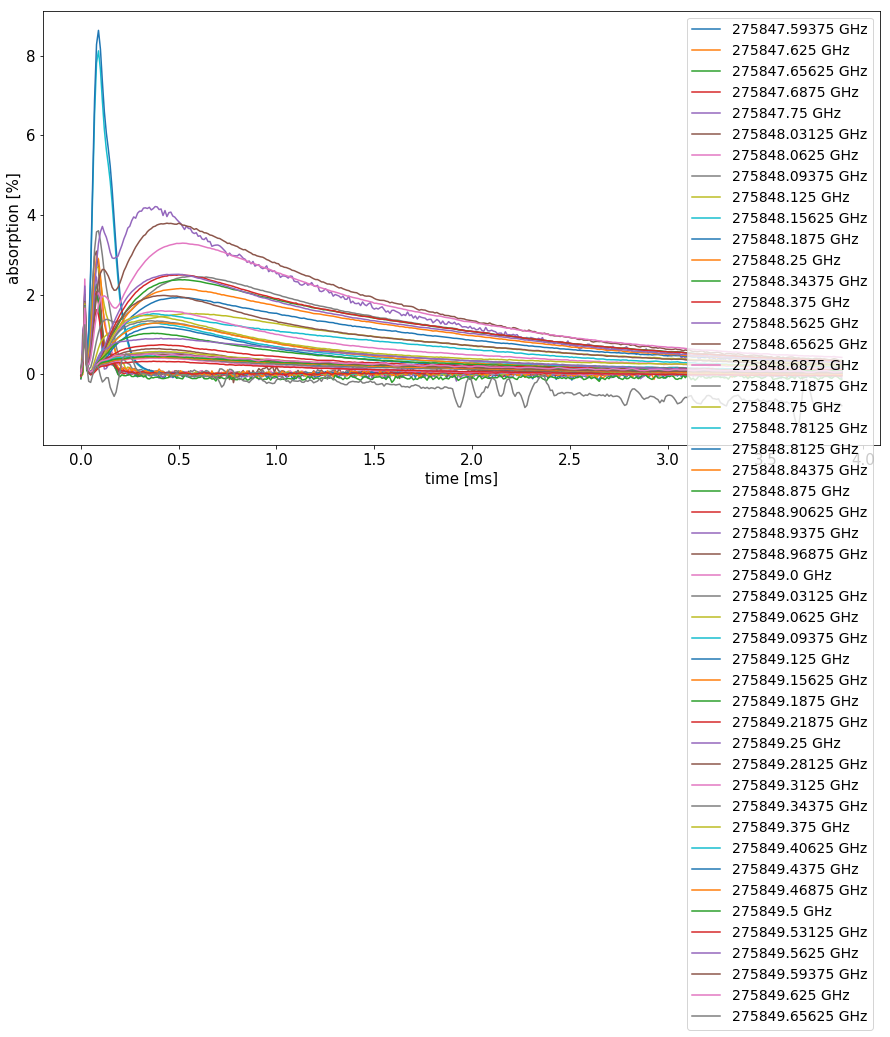

In [164]:
fig, ax = plt.subplots(figsize = (15,8))

for dat in wavelength_data_groupave:
    ax.plot(np.arange(0,len(dat[2][210:600]),1)*1e-2,100*(1-dat[2]/dat[2][0])[210:600], label = '{0} GHz'.format(dat[1]))
ax.legend(fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_xlabel('time [ms]', fontsize = 15)
ax.set_ylabel('absorption [%]', fontsize = 15);
fig.savefig('TlF_absorption_peaks.png')

In [170]:
ta = []
wl, absorption = [],[]
for dat in wavelength_data_groupave:
    wl.append(dat[1])
    absorption.append(100*np.max((1-dat[2]/dat[2][0])[210:600]))
    ta.append(np.mean(dat[-1])*1/25)

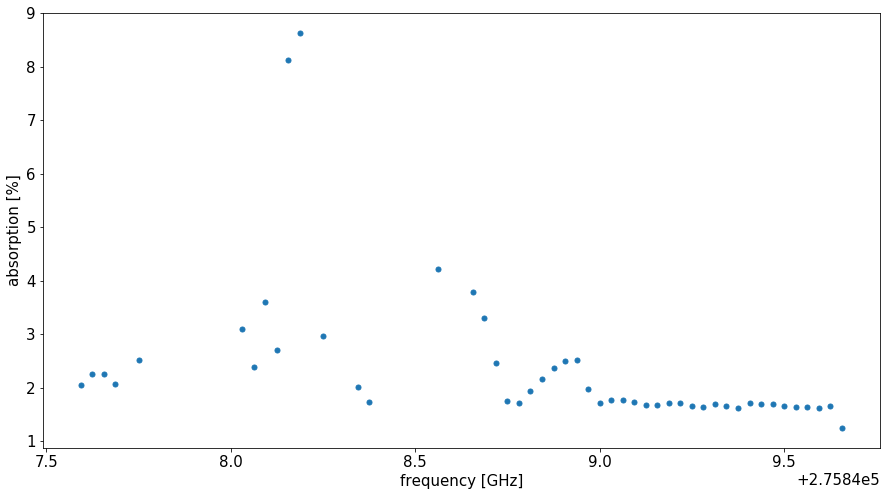

In [171]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(wl, absorption, '.', ms = 10)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)
ax.set_xlabel('frequency [GHz]', fontsize = 15)
ax.set_ylabel('absorption [%]', fontsize = 15);
fig.savefig('TlF_scan.png')

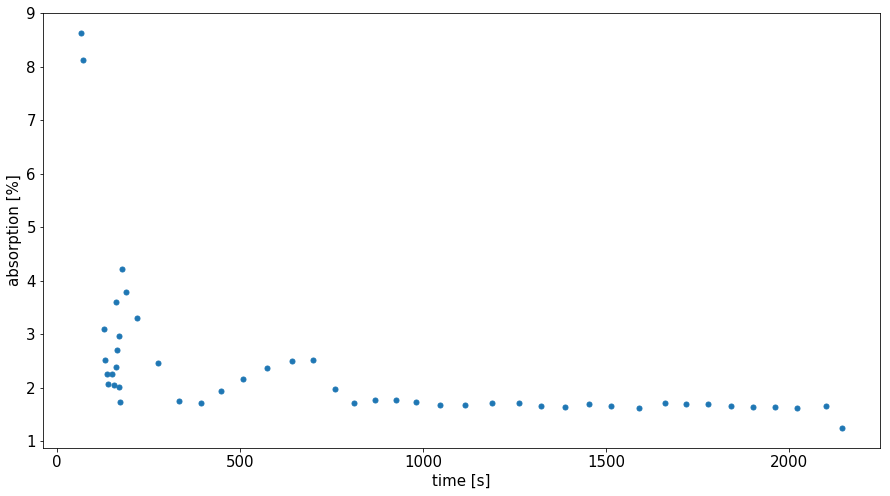

In [172]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(ta, absorption, '.', ms = 10)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)
ax.set_xlabel('time [s]', fontsize = 15)
ax.set_ylabel('absorption [%]', fontsize = 15);
fig.savefig('TlF_scan_time.png')

In [175]:
wavelength_data_groupave[np.argmin(ta)]

(array([   0,    1,    2, ..., 4212, 4213, 4214], dtype=int64),
 275848.1875,
 array([0.61906175, 0.61907498, 0.6190755 , ..., 0.61860193, 0.61857521,
        0.61860958]),
 array([1.000e+00, 2.000e+00, 3.000e+00, ..., 4.213e+03, 4.214e+03,
        4.215e+03]))

# Ablation Spot Decay Run 4

In [234]:
fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    print(list(f.keys()))
    group = f["/1550792279 qswitchdelay 112us ablation spot decay 4"]
    readout = list(group.values())[0]
    wavemeter = list(readout.values())[1].value
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

['1550773250 scan qswitchdelay 112us run1', '1550782394 scan qswitchdelay 112us run2', '1550788252 scan qswitchdelay 112us run3', '1550788550 scan qswitchdelay 112us run3', '1550788924 scan qswitchdelay 112us run5', '1550790130 qswitchdelay 112us ablation spot decay', '1550791455 scan qswitchdelay 112us run6', '1550791773 qswitchdelay 112us ablation spot decay 2', '1550792134 qswitchdelay 112us ablation spot decay 3 same spot shut off neon a bit', '1550792279 qswitchdelay 112us ablation spot decay 4']


In [235]:
yag_fire = []
for idx in range(1,len(fast_daq)):
    yag_fire.append(np.max(fast_daq['PXIe5171_{0}'.format(idx)][:,5]) > 0.5e4)
print(np.where(np.array(yag_fire) == True)[0]+1)

[ 379  380  381 ... 3681 3682 3683]


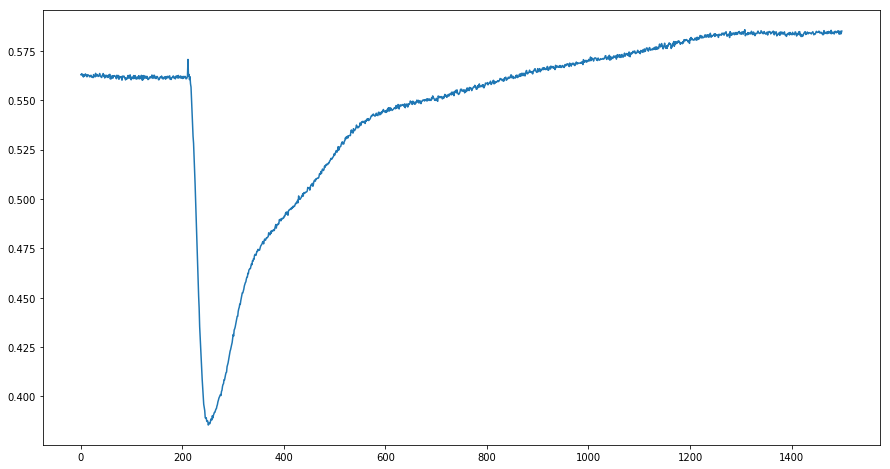

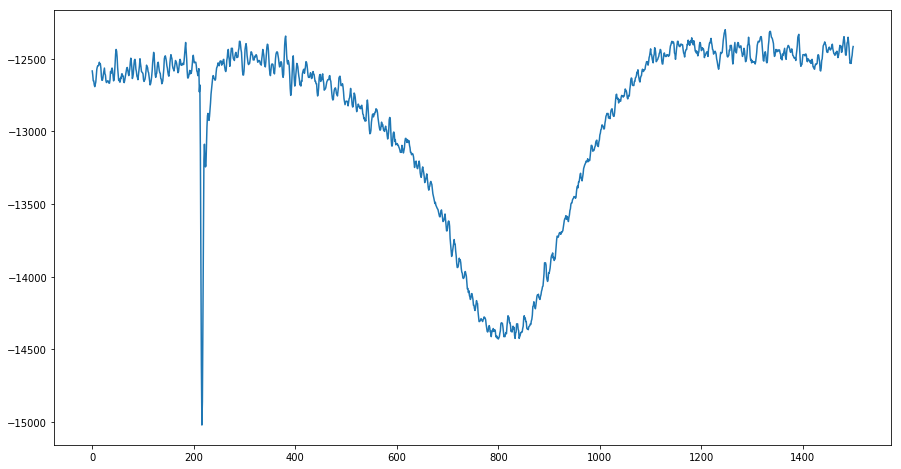

In [249]:
idx = 799
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(fast_daq['PXIe5171_{0}'.format(idx)][:,1]/fast_daq['PXIe5171_{0}'.format(idx)][:,4])
# ax.plot(fast_daq['PXIe5171_{0}'.format(idx)][:,5])
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(fast_daq['PXIe5171_{0}'.format(idx)][:,2])

In [247]:
np.where(np.array(yag_fire) == True)[0][300:]+1

array([ 799,  801,  802, ..., 3681, 3682, 3683], dtype=int64)